In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [8]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [11]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

 **Random Forest Classifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model=RandomForestClassifier()

In [16]:
model.fit(x_train2,y_train.ravel())

RandomForestClassifier()

In [17]:
y_pred=model.predict(x_test2)
y_pred

array([2, 8, 8, ..., 3, 6, 7], dtype=uint8)

In [18]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1059
           1       0.54      0.53      0.54      1015
           2       0.31      0.36      0.33       880
           3       0.26      0.32      0.29       816
           4       0.39      0.40      0.39       986
           5       0.40      0.43      0.42       936
           6       0.55      0.45      0.49      1211
           7       0.46      0.52      0.49       886
           8       0.62      0.59      0.60      1056
           9       0.55      0.47      0.51      1155

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.47      0.46      0.47     10000



In [19]:
cm = confusion_matrix(y_pred,y_test)

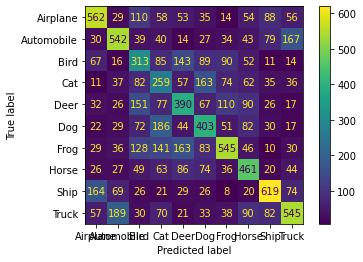

In [20]:
from sklearn import metrics

cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_plot.plot()
plt.show()

 **K Neighbors Classifier**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=7)

In [23]:
knn.fit(x_train2,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [24]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [25]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [26]:
cm1 = confusion_matrix(y_pred_knn,y_test)

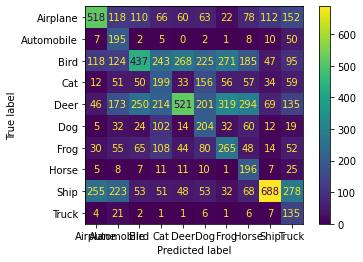

In [27]:
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_plot.plot()
plt.show()